In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import scanpy as sc
import scvi
import sc_utils
import scrublet as scr
warnings.filterwarnings('ignore')


In [2]:
cr_dir = '/projects/b1038/Pulmonary/ziyan/10xGenomics_PBMC_datasets/raw'


In [3]:
adata_sets = []
for s in os.listdir(cr_dir):
    if not s.endswith('.csv'):
        sample_adata = sc.read_10x_h5(f'{cr_dir}/{s}/filtered_feature_bc_matrix.h5')
        #sample_adata = sc.read_10x_h5(cr_dir+"/"+s+"/"+"filtered_feature_bc_matrix.h5")
        sample_adata.var_names_make_unique()
        sample_adata.obs['library_id'] = s
#         scrub = scr.Scrublet(sample_adata.X)
#         doublet_scores, predicted_doublets = scrub.scrub_doublets(verbose=False)
#         sample_adata.obs['doublet_scores'] = doublet_scores
#         sample_adata.obs['predicted_doublets'] = predicted_doublets
        adata_sets.append(sample_adata)
adata = adata_sets[0].concatenate(adata_sets[1:],join='outer')


In [4]:
adata

AnnData object with n_obs × n_vars = 29976 × 38606
    obs: 'library_id', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [5]:
adata.var['ensembl_id'] = adata.var['gene_ids']
adata.var['gene_ids'] = adata.var.index
adata.var['MT'] = adata.var_names.str.startswith('mt-')
adata.var['ribo'] = adata.var_names.str.startswith(('Rps','Rpl'))
sc.pp.calculate_qc_metrics(adata,qc_vars=['MT','ribo'],percent_top=[10,20],log1p=False,inplace=True)

In [6]:
adata



AnnData object with n_obs × n_vars = 29976 × 38606
    obs: 'library_id', 'batch', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'ensembl_id', 'MT', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [7]:
for col in adata.obs.columns:
    if adata.obs[col].dtype == 'category':
        adata.obs[col] = adata.obs[col].astype('str')
adata.write_h5ad('10x_PBMC.h5ad')

In [8]:
adata.obs

,library_id,batch,n_genes_by_counts,total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,total_counts_MT,pct_counts_MT,total_counts_ribo,pct_counts_ribo
AAACCAAAGCGTTACA-1-0,5p_GEM_X_10K_PBMC,0,4000,17626.0,12.526949,20.140701,0.0,0.0,0.0,0.0
AAACCAAAGGCTGGAA-1-0,5p_GEM_X_10K_PBMC,0,6045,35020.0,9.948601,15.171331,0.0,0.0,0.0,0.0
AAACCAAAGGTATCCA-1-0,5p_GEM_X_10K_PBMC,0,3995,17742.0,12.061774,18.791568,0.0,0.0,0.0,0.0
AAACCAGCAATAGCAG-1-0,5p_GEM_X_10K_PBMC,0,4132,17379.0,13.148052,19.535071,0.0,0.0,0.0,0.0
AAACCCATCAATCTGG-1-0,5p_GEM_X_10K_PBMC,0,3878,14828.0,10.743189,16.118155,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGCTATTG-1-3,3p_NextGEM_5K_PBMC,3,2883,8053.0,11.548491,16.701850,0.0,0.0,0.0,0.0
TTTGTTGCATATGCGT-1-3,3p_NextGEM_5K_PBMC,3,3034,9464.0,13.736264,20.054945,0.0,0.0,0.0,0.0
TTTGTTGCATCCGAAT-1-3,3p_NextGEM_5K_PBMC,3,3656,10766.0,8.740479,12.493034,0.0,0.0,0.0,0.0
TTTGTTGCATTGAGGG-1-3,3p_NextGEM_5K_PBMC,3,1755,3553.0,11.849142,16.802702,0.0,0.0,0.0,0.0


In [12]:
test_10x = sc.read_h5ad("../data/PBMC_integrated.h5ad")

In [13]:
test_10x

AnnData object with n_obs × n_vars = 29976 × 2000
    obs: 'library_id', 'batch', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'total_counts_MT', 'pct_counts_MT', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scVI'
    var: 'gene_ids', 'feature_types', 'genome', 'ensembl_id', 'MT', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', 'hvg', 'leiden', 'log1p', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

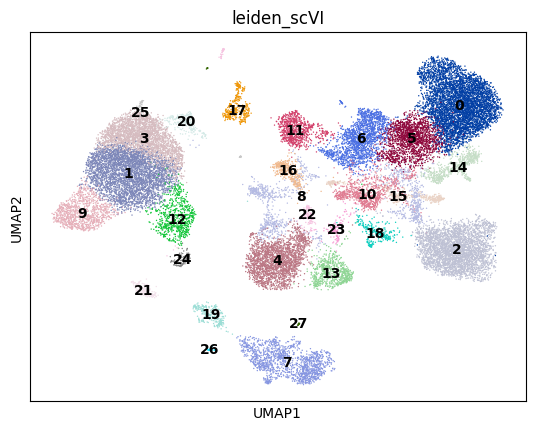

In [14]:
sc.pl.umap(test_10x,color='leiden_scVI',legend_loc='on data')

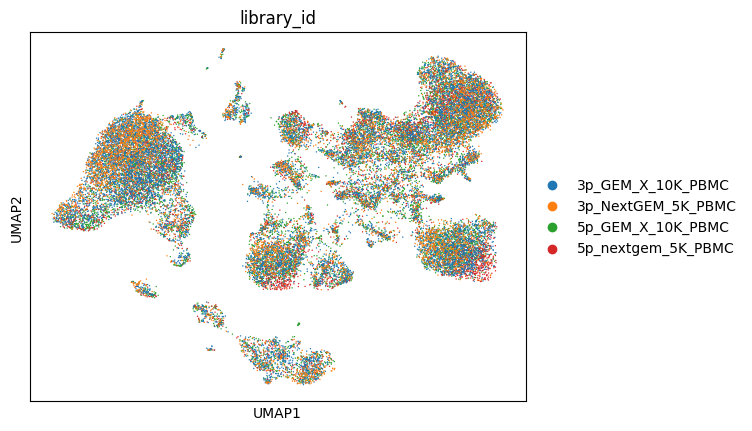

In [15]:
sc.pl.umap(test_10x,color='library_id')

In [11]:
os.listdir('../data/PBMC_integrated.h5ad')


['PBMC_integrated.h5ad',
 'PBMC_integrated-markers.csv',
 'with_chem_version',
 'PBMC_integrated-metadata.csv',
 'without_chem_version',
 '10x_PBMC.h5ad']